In [22]:
## The following code ensures that all functions and init files are reloaded before executions.
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import geopandas as gpd
from insitupy.utils.geo import parse_geopandas
from insitupy.utils.io import read_json
import numpy as np
import shapely
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from insitupy import XeniumData
from rasterio.features import rasterize
from pathlib import Path

In [24]:
baysor_folder = Path(r"C:\Users\ge37voy\OneDrive - TUM\data\2315_VascularCancer_Mogler\2315-02-glioblastoma\20240112__122324__2315-02-Glioblastoma\baysor\baysor_output-0017313__N-42-20-T__20240219__155112")
#annotfile = Path(r"C:\Users\ge37voy\Github\InSituPy\notebooks\demo_annotations\annotations-slide_id__sample_id__demo2.geojson")
xdfile = Path(r"C:\Users\ge37voy\OneDrive - TUM\data\2315_VascularCancer_Mogler\2315-02-glioblastoma\20240112__122324__2315-02-Glioblastoma\output_reseg-0017313__N-42-20-T__20240213__135523")

In [43]:
jsonfile = baysor_folder / "segmentation_polygons.json"
d = read_json(jsonfile)
xd = XeniumData(xdfile)

In [49]:
xd.read_cells()
xd.read_images()

Reading cells...
Reading images...


In [50]:
xd.cells.boundaries.nuclear

dask.array<from-zarr, shape=(20539, 28483), dtype=uint32, chunksize=(642, 891), chunktype=numpy.ndarray>

In [51]:
xd.show()

In [52]:
testdir = "tmp/testdirbound"

In [55]:
xd.save(testdir, overwrite=True)

pyr1
pyr in loop 0
pyr in loop 1
pyr in loop 2
pyr in loop 3
pyr in loop 4
pyr in loop 5
pyr1
pyr in loop 0
pyr in loop 1
pyr in loop 2
pyr in loop 3
pyr in loop 4
pyr in loop 5


In [56]:
xx = XeniumData(testdir)

In [60]:
xx.read_all()

Reading annotations...
No `annotations` modality found.
Reading cells...


c:\Users\ge37voy\AppData\Local\miniconda3\envs\insitupy\lib\site-packages\anndata\__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Reading images...
Reading regions...
No `regions` modality found.
No `transcripts` modality found.


In [61]:
xx

XeniumData
Slide ID:	0017313
Sample ID:	N-42-20-T
Data path:	tmp
Data folder:	testdirbound
Metadata file:	.xeniumdata
    ➤ images
       nuclei:	(20539, 28483)
    ➤ cells
       matrix
           AnnData object with n_obs × n_vars = 58264 × 314
           obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area'
           var: 'gene_ids', 'feature_types', 'genome'
           obsm: 'spatial'
           varm: 'binned_expression'
       boundaries
           BoundariesData object with 2 entries:
               nuclear
               cellular

In [62]:
xx.cells.boundaries.nuclear

[dask.array<from-zarr, shape=(20539, 28483), dtype=uint32, chunksize=(642, 891), chunktype=numpy.ndarray>,
 dask.array<from-zarr, shape=(10270, 14242), dtype=uint32, chunksize=(4815, 6690), chunktype=numpy.ndarray>,
 dask.array<from-zarr, shape=(5135, 7121), dtype=uint32, chunksize=(5014, 6690), chunktype=numpy.ndarray>,
 dask.array<from-zarr, shape=(2568, 3561), dtype=uint32, chunksize=(2568, 3561), chunktype=numpy.ndarray>,
 dask.array<from-zarr, shape=(1284, 1781), dtype=uint32, chunksize=(1284, 1781), chunktype=numpy.ndarray>,
 dask.array<from-zarr, shape=(642, 891), dtype=uint32, chunksize=(642, 891), chunktype=numpy.ndarray>,
 dask.array<from-zarr, shape=(321, 446), dtype=uint32, chunksize=(321, 446), chunktype=numpy.ndarray>]

In [67]:
xx.show()

In [31]:
xd.read_all()

Reading annotations...
No `annotations` modality found.
Reading cells...
Reading images...
Reading regions...
No `regions` modality found.
Reading transcripts...


In [32]:
from insitupy.image.utils import create_img_pyramid

In [34]:
xd.save("tmp/testbinaries")

0
1
2
3
4
5
6


In [40]:
xd.cells.boundaries.nuclear

dask.array<from-zarr, shape=(20539, 28483), dtype=uint32, chunksize=(642, 891), chunktype=numpy.ndarray>

In [41]:
xd.show()

In [42]:
xd

XeniumData
Slide ID:	0017313
Sample ID:	N-42-20-T
Data path:	C:\Users\ge37voy\OneDrive - TUM\data\2315_VascularCancer_Mogler\2315-02-glioblastoma\20240112__122324__2315-02-Glioblastoma
Data folder:	output_reseg-0017313__N-42-20-T__20240213__135523
Metadata file:	experiment.xenium
    ➤ images
       nuclei:	(20539, 28483)
    ➤ cells
       matrix
           AnnData object with n_obs × n_vars = 58264 × 314
           obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area'
           var: 'gene_ids', 'feature_types', 'genome'
           obsm: 'spatial'
           varm: 'binned_expression'
       boundaries
           BoundariesData object with 2 entries:
               nuclear
               cellular
    ➤ transcripts
       DataFrame with shape 13317980 x 9

In [ ]:
# generate filename
filename = Path(img_metadata["file"]).name.split(".")[0] + ".zarr.zip"

# decide whether to save as pyramid or not
if isinstance(img, list):
    if not save_pyramid:
        img = img[0]
else:
    if save_pyramid:
        # create img pyramid
        img = create_img_pyramid(img=img, nsubres=6)

with zarr.ZipStore(path / filename, mode="w") as zipstore:
    # check whether to save the image as pyramid or not
    if save_pyramid:
        for i, im in enumerate(img):
            im.to_zarr(zipstore, component=str(i))
    else:
        # save image data in zipstore without pyramid
        img.to_zarr(zipstore)
    
    # open zarr store save metadata in zarr store
    store = zarr.open(zipstore, mode="a")
    store.attrs.put(img_metadata)

In [30]:
create_img_pyramid(xd.cells.boundaries.nuclear)

pyr1
pyr in loop 0
pyr in loop 1
pyr in loop 2
pyr in loop 3
pyr in loop 4
pyr in loop 5


[dask.array<from-zarr, shape=(20539, 28483), dtype=uint32, chunksize=(642, 891), chunktype=numpy.ndarray>,
 dask.array<getitem, shape=(10270, 14242), dtype=uint32, chunksize=(321, 446), chunktype=numpy.ndarray>,
 dask.array<getitem, shape=(5135, 7121), dtype=uint32, chunksize=(161, 223), chunktype=numpy.ndarray>,
 dask.array<getitem, shape=(2568, 3561), dtype=uint32, chunksize=(81, 112), chunktype=numpy.ndarray>,
 dask.array<getitem, shape=(1284, 1781), dtype=uint32, chunksize=(41, 56), chunktype=numpy.ndarray>,
 dask.array<getitem, shape=(642, 891), dtype=uint32, chunksize=(21, 28), chunktype=numpy.ndarray>,
 dask.array<getitem, shape=(321, 446), dtype=uint32, chunksize=(11, 14), chunktype=numpy.ndarray>]

In [6]:
xd.images.nuclei

[dask.array<from-zarr, shape=(20539, 28483), dtype=uint16, chunksize=(1024, 1024), chunktype=numpy.ndarray>,
 dask.array<from-zarr, shape=(10269, 14241), dtype=uint16, chunksize=(1024, 1024), chunktype=numpy.ndarray>,
 dask.array<from-zarr, shape=(5134, 7120), dtype=uint16, chunksize=(1024, 1024), chunktype=numpy.ndarray>,
 dask.array<from-zarr, shape=(2567, 3560), dtype=uint16, chunksize=(1024, 1024), chunktype=numpy.ndarray>,
 dask.array<from-zarr, shape=(1283, 1780), dtype=uint16, chunksize=(1024, 1024), chunktype=numpy.ndarray>,
 dask.array<from-zarr, shape=(641, 890), dtype=uint16, chunksize=(641, 890), chunktype=numpy.ndarray>,
 dask.array<from-zarr, shape=(320, 445), dtype=uint16, chunksize=(320, 445), chunktype=numpy.ndarray>]

In [ ]:
xd.show()

pyr1
pyr in loop 0
pyr in loop 1
pyr in loop 2
pyr in loop 3
pyr in loop 4
pyr in loop 5
pyr1
pyr in loop 0
pyr in loop 1
pyr in loop 2
pyr in loop 3
pyr in loop 4
pyr in loop 5
pyr1


In [8]:
xd.save("tmp/testzarr", images_as_zarr=True, overwrite=True)

0
1
2
3
4
5
6


In [9]:
xx = XeniumData("tmp/testzarr")

In [16]:
xx.read_all()

Reading annotations...
No `annotations` modality found.
Reading cells...
No `cells` modality found.
Reading images...
Reading regions...
No `regions` modality found.
No `transcripts` modality found.


In [17]:
xx.images.nuclei

[dask.array<from-zarr, shape=(20539, 28483), dtype=uint16, chunksize=(1024, 1024), chunktype=numpy.ndarray>,
 dask.array<from-zarr, shape=(10269, 14241), dtype=uint16, chunksize=(1024, 1024), chunktype=numpy.ndarray>,
 dask.array<from-zarr, shape=(5134, 7120), dtype=uint16, chunksize=(1024, 1024), chunktype=numpy.ndarray>,
 dask.array<from-zarr, shape=(2567, 3560), dtype=uint16, chunksize=(1024, 1024), chunktype=numpy.ndarray>,
 dask.array<from-zarr, shape=(1283, 1780), dtype=uint16, chunksize=(1024, 1024), chunktype=numpy.ndarray>,
 dask.array<from-zarr, shape=(641, 890), dtype=uint16, chunksize=(641, 890), chunktype=numpy.ndarray>,
 dask.array<from-zarr, shape=(320, 445), dtype=uint16, chunksize=(320, 445), chunktype=numpy.ndarray>]

In [20]:
xx.images

images
nuclei:	(20539, 28483)

In [21]:
xx.show()

In [24]:
xd.read_all()

Reading annotations...
No `annotations` modality found.
Reading cells...
Reading images...
Reading regions...
No `regions` modality found.
Reading transcripts...


In [25]:
xd.transcripts

coordinates                         properties             \
                           x            y          z       gene         qv   
transcript_id                                                                
281474976710664   149.553024    73.170303  29.915363       MYL9  26.524508   
281474976710702    46.675030    21.991718  30.185854     COL3A1  13.201921   
281474976710706    84.918762   158.365494  30.195156      HIF1A  40.000000   
281474976710707    92.162636   170.429077  30.180128     COL3A1  40.000000   
281474976710709   134.156174   191.997559  30.877056      HIF1A  40.000000   
...                      ...          ...        ...        ...        ...   
281646775438518  6016.031250  3615.655518  12.617413      MKLN1  40.000000   
281646775438528  6028.385742  3518.558838  12.312579      TAGLN  40.000000   
281646775440118  6008.562988  3565.473633  12.304045     LGALS3  40.000000   
281646775440120  6014.972656  3578.934570  12.340966       CD47  11.326518   
281646775440126  6025.883789  3523.031494  12.111315    SELENOP  27.554773   

                                                               cell_id  
                overlaps_nucleus fov_name nucleus_distance      xenium  
transcript_id                                                           
281474976710664                0      AB1       319.470673  UNASSIGNED  
281474976710702                0      AB1       431.237976  UNASSIGNED  
281474976710706                0      AB1       378.817810  UNASSIGNED  
281474976710707                0      AB1       372.528992  UNASSIGNED  
281474976710709                0      AB1       333.722137  UNASSIGNED  
...                          ...      ...              ...         ...  
281646775438518                0     AF10       170.277191  UNASSIGNED  
281646775438528                0     AF10        82.158287  UNASSIGNED  
281646775440118                0     AF10       119.572609  UNASSIGNED  
281646775440120                0     AF10       134.050232  UNASSIGNED  
281646775440126                0     AF10        84.875092  UNASSIGNED  

[13317980 rows x 9 columns]

In [7]:
xd.parse_baysor(baysor_output=baysor_folder)

Parsing count matrix...


c:\Users\ge37voy\AppData\Local\miniconda3\envs\insitupy\lib\site-packages\anndata\_core\anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
c:\Users\ge37voy\AppData\Local\miniconda3\envs\insitupy\lib\site-packages\anndata\_core\anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Reading segmentation masks
	Read polygons
	Convert polygons to segmentation mask
Parsing transcripts data...
	Read data
	Merge with existing data


In [8]:
xd.transcripts

coordinates                         properties             \
                           x            y          z       gene         qv   
transcript_id                                                                
281474976710664   149.553024    73.170303  29.915363       MYL9  26.524508   
281474976710706    84.918762   158.365494  30.195156      HIF1A  40.000000   
281474976710707    92.162636   170.429077  30.180128     COL3A1  40.000000   
281474976710709   134.156174   191.997559  30.877056      HIF1A  40.000000   
281474976710718   215.580597    56.402271  29.619436      HIF1A  40.000000   
...                      ...          ...        ...        ...        ...   
281646775435910  6029.315918  3505.896729  12.154618     COL3A1  40.000000   
281646775438518  6016.031250  3615.655518  12.617413      MKLN1  40.000000   
281646775438528  6028.385742  3518.558838  12.312579      TAGLN  40.000000   
281646775440118  6008.562988  3565.473633  12.304045     LGALS3  40.000000   
281646775440126  6025.883789  3523.031494  12.111315    SELENOP  27.554773   

                                                               cell_id         
                overlaps_nucleus fov_name nucleus_distance      xenium baysor  
transcript_id                                                                  
281474976710664                0      AB1       319.470673  UNASSIGNED    NaN  
281474976710706                0      AB1       378.817810  UNASSIGNED    NaN  
281474976710707                0      AB1       372.528992  UNASSIGNED    NaN  
281474976710709                0      AB1       333.722137  UNASSIGNED    NaN  
281474976710718                0      AB1       259.262878  UNASSIGNED    NaN  
...                          ...      ...              ...         ...    ...  
281646775435910                0     AF10        72.050278  UNASSIGNED    NaN  
281646775438518                0     AF10       170.277191  UNASSIGNED    NaN  
281646775438528                0     AF10        82.158287  UNASSIGNED    NaN  
281646775440118                0     AF10       119.572609  UNASSIGNED    NaN  
281646775440126                0     AF10        84.875092  UNASSIGNED    NaN  

[10911535 rows x 10 columns]

In [26]:
xd.metadata

{'major_version': 3,
 'minor_version': 0,
 'patch_version': 0,
 'run_name': '2315-02-Glioblastoma',
 'run_start_time': '2024-01-12T12:23:25Z',
 'region_name': 'N-42-20-T',
 'preservation_method': 'ffpe',
 'num_cells': 58264,
 'transcripts_per_cell': 170,
 'transcripts_per_100um': 77.83265830301424,
 'cassette_name': '2315-02-Slide2',
 'slide_id': '0017313',
 'panel_design_id': '9MHNNK',
 'panel_predesigned_id': '',
 'panel_name': 'hArtery_314g',
 'panel_organism': 'Human',
 'panel_tissue_type': 'Artery',
 'panel_num_targets_predesigned': 0,
 'panel_num_targets_custom': 314,
 'pixel_size': 0.2125,
 'instrument_sn': 'XETG00050',
 'instrument_sw_version': '1.7.6.0',
 'analysis_sw_version': 'xenium-1.7.1.0',
 'analysis_uuid': '7c46541b-3dce-4656-8797-15a7619b9311',
 'experiment_uuid': 'ec1b7835-a5da-4fbc-960e-f93a0824f6b5',
 'cassette_uuid': '6d6abcf0-75f2-4d7a-84a7-beb19533786b',
 'roi_uuid': '3cf76a67-5d63-49e2-a5c2-7b122bb9224d',
 'z_step_size': 3.0,
 'well_uuid': 'def_b039298d_rec_633f

In [29]:
xd.images.metadata.keys()

dict_keys(['nuclei'])

In [41]:
xd.images.save("tmp/testsaveimages", images_as_zarr=False, overwrite=True)

In [40]:
xd.images.save("tmp/testsaveimageszarr", images_as_zarr=True, overwrite=True)

In [42]:
xd.save("tmp/savetestall")

c:\Users\ge37voy\AppData\Local\miniconda3\envs\insitupy\lib\zipfile.py:1514: UserWarning: Duplicate name: '.zattrs'
  return self._open_to_write(zinfo, force_zip64=force_zip64)


In [43]:
reload = XeniumData("tmp/savetestall/")

In [44]:
reload

XeniumData
Slide ID:	0017313
Sample ID:	N-42-20-T
Data path:	tmp
Data folder:	savetestall
Metadata file:	.xeniumdata

In [45]:
reload.read_all()

Reading annotations...
No `annotations` modality found.
Reading cells...


c:\Users\ge37voy\AppData\Local\miniconda3\envs\insitupy\lib\site-packages\anndata\__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Reading images...
Reading regions...
No `regions` modality found.
Reading transcripts...


In [46]:
reload

XeniumData
Slide ID:	0017313
Sample ID:	N-42-20-T
Data path:	tmp
Data folder:	savetestall
Metadata file:	.xeniumdata
    ➤ images
       nuclei:	(20539, 28483)
    ➤ cells
       matrix
           AnnData object with n_obs × n_vars = 58264 × 314
           obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area'
           var: 'gene_ids', 'feature_types', 'genome'
           obsm: 'spatial'
           varm: 'binned_expression'
       boundaries
           BoundariesData object with 2 entries:
               nuclear
               cellular
    ➤ transcripts
       DataFrame with shape 13317980 x 9

In [62]:
xd.cells.matrix.var_names

Index(['A2ML1', 'ABCC9', 'ABCD4', 'ABO', 'ACKR1', 'ACTA2', 'ACTN2', 'ADAM33',
       'ADGRF5', 'AFF3',
       ...
       'VIM', 'VIPR2', 'VWF', 'XCL1', 'XRCC1', 'XRCC3', 'XRCC5', 'XRCC6',
       'ZNF683', 'ZNF860'],
      dtype='object', length=314)

In [63]:
genes = ['A2ML1', 'ABCC9', 'ABCD4', 'ABO', 'ACKR1', 'ACTA2', 'ACTN2', 'ADAM33',
       'ADGRF5', 'AFF3',
       'VIM', 'VIPR2', 'VWF', 'XCL1', 'XRCC1', 'XRCC3', 'XRCC5', 'XRCC6',
       'ZNF683', 'ZNF860']

In [94]:
img = xd.cells.matrix.varm["binned_expression"][6]

In [109]:
loc = xd.cells.matrix.var_names.get_loc("BMPR2")
img = xd.cells.matrix.varm["binned_expression"][loc]

In [110]:
img.max()

10

In [116]:
img.shape

(436, 606)

In [118]:
np.percentile(img[img>0], 95)

3.0

In [119]:
np.percentile(img.flatten(), 95)

2.0

In [69]:
len(genes)

20

In [124]:
xd.plot_binned_expression(genes=xd.cells.matrix.var_names, 
                          savepath="tmp/binnedexp.pdf",
                          save_only=True
                          )

Saving figure to file tmp/binnedexp.pdf
Saved.


In [59]:
gene = "ABO"

binex = xd.cells.matrix.varm["binned_expression"]
genes = xd.cells.matrix.var_names

gene_loc = genes.get_loc(gene)




In [61]:
binex[gene_loc]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [49]:
reload.show()

In [9]:
xd.quicksave()

No annotations found. Quicksave skipped.


In [32]:
xd.show()

In [136]:
xd.store_annotations()

Added 3 new annotations to existing key 'asdf'


In [137]:
xd.annotations

annotations
asdf:	6 annotations, 2 classes ('blubb','newclass') 

In [169]:
xd.quicksave(note="Test note. Blubb.")

In [170]:
xd.quicksave_dir

WindowsPath('C:/Users/ge37voy/.cache/InSituPy/quicksaves')

In [173]:
xd.list_quicksaves()

,slide_id,sample_id,savetime,uid,note
0,0017313,N-42-20-T,240305_13-59-54,3f74dfdd,
1,0017313,N-42-20-T,240305_14-34-28,2ed72c6c,
2,0017313,N-42-20-T,240305_15-01-52,ab30391d,
3,0017313,N-42-20-T,240305_15-01-59,5e6d7fb9,Test note. Blubb.


In [174]:
xd

XeniumData
Slide ID:	0017313
Sample ID:	N-42-20-T
Data path:	C:\Users\ge37voy\OneDrive - TUM\data\2315_VascularCancer_Mogler\2315-02-glioblastoma\20240112__122324__2315-02-Glioblastoma
Data folder:	output_reseg-0017313__N-42-20-T__20240213__135523
Metadata file:	experiment.xenium
    ➤ images
       nuclei:	(20539, 28483)
    ➤ cells
       matrix
           AnnData object with n_obs × n_vars = 58264 × 314
           obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area'
           var: 'gene_ids', 'feature_types', 'genome'
           obsm: 'spatial'
           varm: 'binned_expression'
       boundaries
           BoundariesData object with 2 entries:
               nuclear
               cellular
    ➤ transcripts
       DataFrame with shape 10911535 x 10
    ➤ annotations
       asdf:	6 annotations, 2 classes ('blubb','newclass') 
    ➤ alt
       Alternative

In [181]:
ad = xd.load_quicksave(uid="5e6d7fb9")

In [186]:
ad.metadata.keys()

dict_keys(['asdf'])

In [187]:
xd.annotations

annotations
asdf:	6 annotations, 2 classes ('blubb','newclass') 

In [192]:
type(ad.asdf)

geopandas.geodataframe.GeoDataFrame

In [197]:
del xd.annotations

In [198]:
xd.show()

In [199]:
xd.store_annotations()

Added 5 new annotations to key 'adsfadsfadf'
Added 7 new annotations to existing key 'adsfadsfadf'


In [200]:
xd

XeniumData
Slide ID:	0017313
Sample ID:	N-42-20-T
Data path:	C:\Users\ge37voy\OneDrive - TUM\data\2315_VascularCancer_Mogler\2315-02-glioblastoma\20240112__122324__2315-02-Glioblastoma
Data folder:	output_reseg-0017313__N-42-20-T__20240213__135523
Metadata file:	experiment.xenium
    ➤ images
       nuclei:	(20539, 28483)
    ➤ cells
       matrix
           AnnData object with n_obs × n_vars = 58264 × 314
           obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area'
           var: 'gene_ids', 'feature_types', 'genome'
           obsm: 'spatial'
           varm: 'binned_expression'
       boundaries
           BoundariesData object with 2 entries:
               nuclear
               cellular
    ➤ transcripts
       DataFrame with shape 10911535 x 10
    ➤ annotations
       adsfadsfadf:	12 annotations, 2 classes ('ökjakdjf','hlhlhklsdf') 
    ➤ alt
     

In [201]:
xd.annotations.add_shapes(ad.asdf, "asdf")

In [210]:
del xd.annotations

In [211]:
xd.store_annotations()

Added 5 new annotations to key 'adsfadsfadf'
Added 7 new annotations to existing key 'adsfadsfadf'


In [212]:
xd.list_quicksaves()

,slide_id,sample_id,savetime,uid,note
0,0017313,N-42-20-T,240305_13-59-54,3f74dfdd,
1,0017313,N-42-20-T,240305_14-34-28,2ed72c6c,
2,0017313,N-42-20-T,240305_15-01-52,ab30391d,
3,0017313,N-42-20-T,240305_15-01-59,5e6d7fb9,Test note. Blubb.


In [213]:
xd.load_quicksave("5e6d7fb9")

Added 6 new annotations to key 'asdf'


In [215]:
xd

: 

In [196]:
xd.annotations

annotations
asdf:	6 annotations, 2 classes ('blubb','newclass') 

In [194]:
ad.asdf.index.name

'id'

In [184]:
type(ad)

insitupy._core.dataclasses.AnnotationsData

In [183]:
ad.asdf

,objectType,origin,geometry,name,color
id,,,,,
6c249a66-c4e4-422f-9a4a-903c224400fb,annotation,file,"POLYGON ((846.41741 2800.40831, 808.17539 3017...",blubb,"[255, 0, 0]"
14b67b61-190c-4e4d-b1f2-aedd26154639,annotation,file,"POLYGON ((1509.27904 2277.76740, 1713.23647 25...",blubb,"[255, 0, 0]"
da41456d-a6f4-4c11-8a9d-3faa0ebd0c71,annotation,file,"POLYGON ((3778.30541 2290.51474, 3663.57935 24...",blubb,"[255, 0, 0]"
8df112ce-2d24-49ae-8bdf-ac32b10adc92,annotation,file,"POLYGON ((1789.72050 467.64525, 2427.08746 123...",newclass,"[255, 0, 0]"
2cb70ed0-fec6-43a1-84dc-6dd797fc54d8,annotation,file,"POLYGON ((2337.85608 3374.03857, 2541.81351 36...",newclass,"[255, 0, 0]"
39b71bf5-617e-4386-9811-3a2cc6b89a09,annotation,file,"POLYGON ((-71.39101 2277.76740, 183.55577 3119...",newclass,"[255, 0, 0]"


In [177]:
list(xd.quicksave_dir.glob("*5e6d7fb9*"))

[WindowsPath('C:/Users/ge37voy/.cache/InSituPy/quicksaves/0017313__N-42-20-T__240305_15-01-59__5e6d7fb9')]

In [149]:
from insitupy._core.xeniumdata import read_annotationsdata

In [160]:
d = Path(r"C:\Users\ge37voy\.cache\InSituPy\quicksaves\0017313__N-42-20-T__240305_14-34-28__2ed72c6c")

In [162]:
read_annotationsdata(d / "annotations")

annotations
asdf:	6 annotations, 2 classes ('blubb','newclass') 

In [167]:
xd.list_quicksaves()

,slide_id,sample_id,savetime,uid
0,0017313,N-42-20-T,240305_13-59-54,3f74dfdd
1,0017313,N-42-20-T,240305_14-34-28,2ed72c6c


In [128]:
xd.annotations

AttributeError: 'AnnotationsData' object has no attribute 'metadata'

In [123]:
xd

AttributeError: 'AnnotationsData' object has no attribute 'metadata'

In [108]:
xd.alt["baysor"]

matrix
    AnnData object with n_obs × n_vars = 95335 × 314
    obs: 'CellID', 'area', 'avg_assignment_confidence', 'avg_confidence', 'cluster', 'density', 'elongation', 'lifespan', 'max_cluster_frac', 'n_transcripts', 'z'
    obsm: 'spatial'
boundaries
    BoundariesData object with 1 entry:
        baysor_cellular

In [105]:
list(zip(df["geometry"], df["cell"]))[0]

(<LINESTRING (408.942 3893.288, 408.862 3892.244, 408.942 3893.288)>, 92533)

In [93]:
xd.show()

In [94]:
xd

XeniumData
Slide ID:	0017313
Sample ID:	N-42-20-T
Data path:	C:\Users\ge37voy\OneDrive - TUM\data\2315_VascularCancer_Mogler\2315-02-glioblastoma\20240112__122324__2315-02-Glioblastoma
Data folder:	output_reseg-0017313__N-42-20-T__20240213__135523
Metadata file:	experiment.xenium
    ➤ images
       nuclei:	(20539, 28483)
    ➤ cells
       matrix
           AnnData object with n_obs × n_vars = 58264 × 314
           obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area'
           var: 'gene_ids', 'feature_types', 'genome'
           obsm: 'spatial'
           varm: 'binned_expression'
       boundaries
           BoundariesData object with 2 entries:
               nuclear
               cellular
    ➤ transcripts
       DataFrame with shape 10911535 x 12
    ➤ alt
       Alternative CellData objects with following keys: baysor

In [95]:
xd.alt["baysor"]

matrix
    AnnData object with n_obs × n_vars = 95335 × 314
    obs: 'CellID', 'area', 'avg_assignment_confidence', 'avg_confidence', 'cluster', 'density', 'elongation', 'lifespan', 'max_cluster_frac', 'n_transcripts', 'z'
    obsm: 'spatial'
boundaries
    BoundariesData object with 1 entry:
        baysor_cellular

In [99]:
int(xd.alt["baysor"].boundaries.baysor_cellular.max())

95334

In [102]:
df

,geometry,cell,type,minx,miny,maxx,maxy
0,"LINESTRING (408.942 3893.288, 408.862 3892.244...",92533,line,408.86166,3892.2444,408.9425,3893.2883
1,"POLYGON ((2824.815 1734.873, 2825.488 1734.788...",76914,polygon,2822.81180,1732.0654,2826.1433,1734.9199
2,"POLYGON ((2046.403 4059.931, 2047.639 4057.048...",45120,polygon,2040.69520,4055.8274,2048.0332,4068.9358
3,"POLYGON ((1138.302 1831.298, 1145.706 1831.745...",1703,polygon,1133.03440,1814.2921,1149.5397,1831.7451
4,"POLYGON ((3523.646 2087.579, 3523.313 2087.013...",37100,polygon,3506.09900,2077.4817,3525.0342,2100.6936
...,...,...,...,...,...,...,...
97817,"POLYGON ((1250.479 2376.595, 1250.410 2377.973...",7506,polygon,1250.41030,2363.5469,1268.1637,2385.2366
97818,"POLYGON ((3161.981 3813.420, 3159.799 3811.974...",64941,polygon,3159.42480,3811.9736,3162.3333,3814.6128
97819,"POLYGON ((2730.878 1721.796, 2730.510 1724.572...",17984,polygon,2730.04900,1711.0363,2750.8193,1732.8375
97820,"POLYGON ((5645.895 847.951, 5646.342 848.300, ...",49493,polygon,5637.61000,846.2957,5657.2710,867.1212


In [42]:
from insitupy.utils.io import read_baysor_polygons

In [44]:
df = read_baysor_polygons(r"C:\Users\ge37voy\OneDrive - TUM\data\2315_VascularCancer_Mogler\2315-02-glioblastoma\20240112__122324__2315-02-Glioblastoma\baysor\baysor_output-0017313__N-42-20-T__20240219__155112\segmentation_polygons.json")

In [45]:
df

,geometry,cell,type,minx,miny,maxx,maxy
0,"LINESTRING (408.942 3893.288, 408.862 3892.244...",92533,line,408.86166,3892.2444,408.9425,3893.2883
1,"POLYGON ((2824.815 1734.873, 2825.488 1734.788...",76914,polygon,2822.81180,1732.0654,2826.1433,1734.9199
2,"POLYGON ((2046.403 4059.931, 2047.639 4057.048...",45120,polygon,2040.69520,4055.8274,2048.0332,4068.9358
3,"POLYGON ((1138.302 1831.298, 1145.706 1831.745...",1703,polygon,1133.03440,1814.2921,1149.5397,1831.7451
4,"POLYGON ((3523.646 2087.579, 3523.313 2087.013...",37100,polygon,3506.09900,2077.4817,3525.0342,2100.6936
...,...,...,...,...,...,...,...
97817,"POLYGON ((1250.479 2376.595, 1250.410 2377.973...",7506,polygon,1250.41030,2363.5469,1268.1637,2385.2366
97818,"POLYGON ((3161.981 3813.420, 3159.799 3811.974...",64941,polygon,3159.42480,3811.9736,3162.3333,3814.6128
97819,"POLYGON ((2730.878 1721.796, 2730.510 1724.572...",17984,polygon,2730.04900,1711.0363,2750.8193,1732.8375
97820,"POLYGON ((5645.895 847.951, 5646.342 848.300, ...",49493,polygon,5637.61000,846.2957,5657.2710,867.1212


In [49]:
df.cell.max()

97822

In [54]:
df.query('cell == 3')

,geometry,cell,type,minx,miny,maxx,maxy
91369,"POLYGON ((227.157 609.266, 224.938 612.955, 23...",3,polygon,224.93817,609.2657,232.80249,613.0974


In [50]:
xd.show()

In [55]:
import scanpy as sc

In [71]:
adata = sc.read_loom(r"C:\Users\ge37voy\OneDrive - TUM\data\2315_VascularCancer_Mogler\2315-02-glioblastoma\20240112__122324__2315-02-Glioblastoma\baysor\baysor_output-0017313__N-42-20-T__20240219__155112\segmentation_counts.loom")

c:\Users\ge37voy\AppData\Local\miniconda3\envs\insitupy\lib\site-packages\anndata\_core\anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
c:\Users\ge37voy\AppData\Local\miniconda3\envs\insitupy\lib\site-packages\anndata\_core\anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [72]:
adata.var

,Name
0,A2ML1
1,ABCC9
2,ABCD4
3,ABO
4,ACKR1
...,...
474,XRCC3
475,XRCC5
476,XRCC6
477,ZNF683


In [73]:
adata.obs = adata.obs.reset_index().set_index("Name")

In [84]:
adata.obs["CellID"] = adata.obs["CellID"].astype(float).astype(int)

In [85]:
df.cell

0        92533
1        76914
2        45120
3         1703
4        37100
         ...  
97817     7506
97818    64941
97819    17984
97820    49493
97821    49648
Name: cell, Length: 97822, dtype: int64

In [83]:
adata.obs["CellID"]

Name
CRdf5769f9b-1            1.0
CRdf5769f9b-2            2.0
CRdf5769f9b-3            3.0
CRdf5769f9b-4            4.0
CRdf5769f9b-5            5.0
                      ...   
CRdf5769f9b-97818    97818.0
CRdf5769f9b-97819    97819.0
CRdf5769f9b-97820    97820.0
CRdf5769f9b-97821    97821.0
CRdf5769f9b-97822    97822.0
Name: CellID, Length: 97822, dtype: object

In [91]:
df[df.cell.astype(int).isin(adata.obs["CellID"])]

,geometry,cell,type,minx,miny,maxx,maxy
0,"LINESTRING (408.942 3893.288, 408.862 3892.244...",92533,line,408.86166,3892.2444,408.9425,3893.2883
1,"POLYGON ((2824.815 1734.873, 2825.488 1734.788...",76914,polygon,2822.81180,1732.0654,2826.1433,1734.9199
2,"POLYGON ((2046.403 4059.931, 2047.639 4057.048...",45120,polygon,2040.69520,4055.8274,2048.0332,4068.9358
3,"POLYGON ((1138.302 1831.298, 1145.706 1831.745...",1703,polygon,1133.03440,1814.2921,1149.5397,1831.7451
4,"POLYGON ((3523.646 2087.579, 3523.313 2087.013...",37100,polygon,3506.09900,2077.4817,3525.0342,2100.6936
...,...,...,...,...,...,...,...
97817,"POLYGON ((1250.479 2376.595, 1250.410 2377.973...",7506,polygon,1250.41030,2363.5469,1268.1637,2385.2366
97818,"POLYGON ((3161.981 3813.420, 3159.799 3811.974...",64941,polygon,3159.42480,3811.9736,3162.3333,3814.6128
97819,"POLYGON ((2730.878 1721.796, 2730.510 1724.572...",17984,polygon,2730.04900,1711.0363,2750.8193,1732.8375
97820,"POLYGON ((5645.895 847.951, 5646.342 848.300, ...",49493,polygon,5637.61000,846.2957,5657.2710,867.1212


In [88]:
df.cell.isin(adata.obs["CellID"])

KeyError: 'CellID'

In [67]:
adata.obs

,Name,area,avg_assignment_confidence,avg_confidence,cluster,density,elongation,lifespan,max_cluster_frac,n_transcripts,x,y,z
CellID,,,,,,,,,,,,,
1.0,CRdf5769f9b-1,90.29,0.8712,0.9953,4,0.5759,1.311,50,0.634615,52,461.420912,128.143246,30.973813
2.0,CRdf5769f9b-2,66.05,0.9441,0.9969,1,1.7870,4.282,50,0.957627,118,467.621171,134.560978,30.935955
3.0,CRdf5769f9b-3,17.14,0.8629,0.8821,1,0.4084,3.672,50,1.000000,7,228.107223,611.779329,29.642477
4.0,CRdf5769f9b-4,15.89,0.9717,0.8710,2,0.7552,1.308,50,1.000000,12,335.162922,892.123665,28.459066
5.0,CRdf5769f9b-5,17.79,0.9691,0.9388,4,0.6183,2.314,50,1.000000,11,1457.717373,414.645445,25.214791
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97818.0,CRdf5769f9b-97818,NaN,0.0200,0.9930,1,NaN,NaN,1,1.000000,1,3232.911600,4142.601000,19.829983
97819.0,CRdf5769f9b-97819,NaN,0.0200,0.9995,2,NaN,NaN,1,1.000000,1,1799.796800,3447.747300,21.551792
97820.0,CRdf5769f9b-97820,NaN,0.0200,0.9983,2,NaN,NaN,1,1.000000,1,3233.985000,4125.177700,25.230070


In [47]:
xd.alt["baysor"].matrix.obs

,area,avg_assignment_confidence,avg_confidence,cluster,density,elongation,lifespan,max_cluster_frac,n_transcripts,z
Name,,,,,,,,,,
CRdf5769f9b-1,90.2900,0.87120,0.9953,4,0.5759,1.311,50,0.634615,52,30.973813
CRdf5769f9b-2,66.0500,0.94410,0.9969,1,1.7870,4.282,50,0.957627,118,30.935955
CRdf5769f9b-3,17.1400,0.86290,0.8821,1,0.4084,3.672,50,1.000000,7,29.642477
CRdf5769f9b-4,15.8900,0.97170,0.8710,2,0.7552,1.308,50,1.000000,12,28.459066
CRdf5769f9b-5,17.7900,0.96910,0.9388,4,0.6183,2.314,50,1.000000,11,25.214791
...,...,...,...,...,...,...,...,...,...,...
CRdf5769f9b-97800,2.1910,0.05667,0.9980,1,2.7380,3.523,3,1.000000,6,29.242488
CRdf5769f9b-97803,0.5013,0.06000,0.9980,2,5.9840,13.870,3,1.000000,3,24.342046
CRdf5769f9b-97804,0.7888,0.05500,0.9977,2,5.0710,8.495,3,1.000000,4,20.400714


In [41]:
xd.alt["baysor"].boundaries.baysor

dask.array<array, shape=(4375, 6065), dtype=uint32, chunksize=(4375, 6065), chunktype=numpy.ndarray>

In [20]:
xd.show()

In [10]:
xd

XeniumData
Slide ID:	0017313
Sample ID:	N-42-20-T
Data path:	C:\Users\ge37voy\OneDrive - TUM\data\2315_VascularCancer_Mogler\2315-02-glioblastoma\20240112__122324__2315-02-Glioblastoma
Data folder:	output_reseg-0017313__N-42-20-T__20240213__135523
Metadata file:	experiment.xenium
    ➤ images
       nuclei:	(20539, 28483)
    ➤ cells
       matrix
           AnnData object with n_obs × n_vars = 58264 × 314
           obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area'
           var: 'gene_ids', 'feature_types', 'genome'
           obsm: 'spatial'
           varm: 'binned_expression'
       boundaries
           BoundariesData object with 2 entries:
               nuclear
               cellular
    ➤ transcripts
       DataFrame with shape 10911535 x 10
    ➤ alt
       Alternative CellData objects with following keys: baysor

In [35]:
xd.alt["baysor"].matrix[~xd.alt["baysor"].matrix.obs.isna().any(axis=1)]

View of AnnData object with n_obs × n_vars = 95335 × 314
    obs: 'area', 'avg_assignment_confidence', 'avg_confidence', 'cluster', 'density', 'elongation', 'lifespan', 'max_cluster_frac', 'n_transcripts', 'z'
    obsm: 'spatial'

In [17]:
mask = ~xd.alt["baysor"].matrix.var_names.str.startswith("UnassignedCodeword")

In [18]:
xd.alt["baysor"].matrix[:, mask]

View of AnnData object with n_obs × n_vars = 97822 × 314
    obs: 'area', 'avg_assignment_confidence', 'avg_confidence', 'cluster', 'density', 'elongation', 'lifespan', 'max_cluster_frac', 'n_transcripts', 'z'
    obsm: 'spatial'

In [20]:
xd.alt["baysor"].matrix.obs

,area,avg_assignment_confidence,avg_confidence,cluster,density,elongation,lifespan,max_cluster_frac,n_transcripts,z
Name,,,,,,,,,,
CRdf5769f9b-1,90.29,0.8712,0.9953,4,0.5759,1.311,50,0.634615,52,30.973813
CRdf5769f9b-2,66.05,0.9441,0.9969,1,1.7870,4.282,50,0.957627,118,30.935955
CRdf5769f9b-3,17.14,0.8629,0.8821,1,0.4084,3.672,50,1.000000,7,29.642477
CRdf5769f9b-4,15.89,0.9717,0.8710,2,0.7552,1.308,50,1.000000,12,28.459066
CRdf5769f9b-5,17.79,0.9691,0.9388,4,0.6183,2.314,50,1.000000,11,25.214791
...,...,...,...,...,...,...,...,...,...,...
CRdf5769f9b-97818,NaN,0.0200,0.9930,1,NaN,NaN,1,1.000000,1,19.829983
CRdf5769f9b-97819,NaN,0.0200,0.9995,2,NaN,NaN,1,1.000000,1,21.551792
CRdf5769f9b-97820,NaN,0.0200,0.9983,2,NaN,NaN,1,1.000000,1,25.230070


In [27]:
xd.show()

In [7]:
xd.alt["baysor"].matrix.obs[["x", "y"]].values

array([[ 461.42091154,  128.14324635],
       [ 467.62117136,  134.56097814],
       [ 228.10722286,  611.77932857],
       ...,
       [3233.985     , 4125.1777    ],
       [ 563.3355    , 3121.8074    ],
       [1816.9291    , 3783.78625   ]])

In [8]:
xd.alt

{'baysor': matrix
     AnnData object with n_obs × n_vars = 97822 × 479
     obs: 'Name', 'area', 'avg_assignment_confidence', 'avg_confidence', 'cluster', 'density', 'elongation', 'lifespan', 'max_cluster_frac', 'n_transcripts', 'x', 'y', 'z'
     var: 'Name'
     obsm: 'spatial'
 boundaries
     BoundariesData object with 1 entry:
         baysor}

In [9]:
xd.alt

{'baysor': matrix
     AnnData object with n_obs × n_vars = 97822 × 479
     obs: 'Name', 'area', 'avg_assignment_confidence', 'avg_confidence', 'cluster', 'density', 'elongation', 'lifespan', 'max_cluster_frac', 'n_transcripts', 'x', 'y', 'z'
     var: 'Name'
     obsm: 'spatial'
 boundaries
     BoundariesData object with 1 entry:
         baysor}

In [13]:
xd.show()

In [17]:
xd.alt["baysor"].matrix.var_names

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '469', '470', '471', '472', '473', '474', '475', '476', '477', '478'],
      dtype='object', length=479)

In [13]:
xd.alt["baysor"].boundaries.baysor

dask.array<array, shape=(4375, 6065), dtype=uint32, chunksize=(4375, 6065), chunktype=numpy.ndarray>

In [13]:
savepath = "tmp/savetest2"

In [14]:
xd.save(savepath, overwrite=True)

c:\Users\ge37voy\AppData\Local\miniconda3\envs\insitupy\lib\zipfile.py:1514: UserWarning: Duplicate name: '.zattrs'
  return self._open_to_write(zinfo, force_zip64=force_zip64)


In [10]:
xd.show()

In [17]:
xd.cells.matrix

AnnData object with n_obs × n_vars = 58264 × 314
    obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'
    varm: 'binned_expression'

In [18]:
xd

XeniumData
Slide ID:	0017313
Sample ID:	N-42-20-T
Data path:	C:\Users\ge37voy\OneDrive - TUM\data\2315_VascularCancer_Mogler\2315-02-glioblastoma\20240112__122324__2315-02-Glioblastoma
Data folder:	output_reseg-0017313__N-42-20-T__20240213__135523
Metadata file:	experiment.xenium
    ➤ images
       nuclei:	(20539, 28483)
    ➤ cells
       matrix
           AnnData object with n_obs × n_vars = 58264 × 314
           obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area'
           var: 'gene_ids', 'feature_types', 'genome'
           obsm: 'spatial'
           varm: 'binned_expression'
       boundaries
           BoundariesData object with 2 entries:
               nuclear
               cellular
    ➤ transcripts
       DataFrame with shape 10911535 x 10
    ➤ alt
       Alternative CellData objects with following keys: baysor

In [20]:
xd.alt['baysor']

matrix
    AnnData object with n_obs × n_vars = 97822 × 479
    obs: 'Name', 'area', 'avg_assignment_confidence', 'avg_confidence', 'cluster', 'density', 'elongation', 'lifespan', 'max_cluster_frac', 'n_transcripts', 'x', 'y', 'z'
    var: 'Name'
boundaries
    BoundariesData object with 1 entry:
        baysor

In [52]:
savepath

WindowsPath('C:/Users/ge37voy/OneDrive - TUM/data/2315_VascularCancer_Mogler/2315-02-glioblastoma/20240112__122324__2315-02-Glioblastoma/baysor/savetest')

# Next step: Implement reading of `.alt` object

In [9]:
df = {
    "geometry": [],
    "cell": [],
    "type": [],
    "minx": [],
    "miny": [],
    "maxx": [],
    "maxy": []
}
for elem in tqdm(d["geometries"]):
    coords = elem["coordinates"][0]
    
    # check if there are enough coordinates for a Polygon (some segmented cells are very small in Baysor)
    if len(coords) > 3:
        p = shapely.Polygon(coords)
        df["geometry"].append(p)
        df["type"].append("polygon")
    
    else:
        p = shapely.LineString(coords)
        df["geometry"].append(p)
        df["type"].append("line")
    df["cell"].append(elem["cell"])
    
    # extract bounding box
    bounds = p.bounds
    df["minx"].append(bounds[0])
    df["miny"].append(bounds[1])
    df["maxx"].append(bounds[2])
    df["maxy"].append(bounds[3])

# create geopandas dataframe
df = gpd.GeoDataFrame(df)

100%|██████████| 97822/97822 [00:04<00:00, 23596.51it/s]


In [82]:
list(xd.metadata.keys())

['major_version',
 'minor_version',
 'patch_version',
 'run_name',
 'run_start_time',
 'region_name',
 'preservation_method',
 'num_cells',
 'transcripts_per_cell',
 'transcripts_per_100um',
 'cassette_name',
 'slide_id',
 'panel_design_id',
 'panel_predesigned_id',
 'panel_name',
 'panel_organism',
 'panel_tissue_type',
 'panel_num_targets_predesigned',
 'panel_num_targets_custom',
 'pixel_size',
 'instrument_sn',
 'instrument_sw_version',
 'analysis_sw_version',
 'analysis_uuid',
 'experiment_uuid',
 'cassette_uuid',
 'roi_uuid',
 'z_step_size',
 'well_uuid',
 'calibration_uuid',
 'images',
 'xenium_explorer_files',
 'xenium_ranger']

In [80]:
xd

XeniumData
Slide ID:	0017313
Sample ID:	N-42-20-T
Data path:	C:\Users\ge37voy\OneDrive - TUM\data\2315_VascularCancer_Mogler\2315-02-glioblastoma\20240112__122324__2315-02-Glioblastoma
Data folder:	output_reseg-0017313__N-42-20-T__20240213__135523
Metadata file:	experiment.xenium
    ➤ images
       nuclei:	(20539, 28483)
    ➤ cells
       matrix
           AnnData object with n_obs × n_vars = 58264 × 314
           obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area'
           var: 'gene_ids', 'feature_types', 'genome'
           obsm: 'spatial'
           varm: 'binned_expression'
       boundaries
           BoundariesData object with 2 entries:
               nuclear
               cellular
    ➤ transcripts
       DataFrame with shape 13317980 x 10

In [10]:
df

,geometry,cell,type,minx,miny,maxx,maxy
0,"LINESTRING (408.942 3893.288, 408.862 3892.244...",92533,line,408.86166,3892.2444,408.9425,3893.2883
1,"POLYGON ((2824.815 1734.873, 2825.488 1734.788...",76914,polygon,2822.81180,1732.0654,2826.1433,1734.9199
2,"POLYGON ((2046.403 4059.931, 2047.639 4057.048...",45120,polygon,2040.69520,4055.8274,2048.0332,4068.9358
3,"POLYGON ((1138.302 1831.298, 1145.706 1831.745...",1703,polygon,1133.03440,1814.2921,1149.5397,1831.7451
4,"POLYGON ((3523.646 2087.579, 3523.313 2087.013...",37100,polygon,3506.09900,2077.4817,3525.0342,2100.6936
...,...,...,...,...,...,...,...
97817,"POLYGON ((1250.479 2376.595, 1250.410 2377.973...",7506,polygon,1250.41030,2363.5469,1268.1637,2385.2366
97818,"POLYGON ((3161.981 3813.420, 3159.799 3811.974...",64941,polygon,3159.42480,3811.9736,3162.3333,3814.6128
97819,"POLYGON ((2730.878 1721.796, 2730.510 1724.572...",17984,polygon,2730.04900,1711.0363,2750.8193,1732.8375
97820,"POLYGON ((5645.895 847.951, 5646.342 848.300, ...",49493,polygon,5637.61000,846.2957,5657.2710,867.1212


In [11]:
from math import ceil


In [12]:
xmax = ceil(xd.cells.matrix.obsm['spatial'][:, 0].max() + 15)
ymax = ceil(xd.cells.matrix.obsm['spatial'][:, 1].max() + 15)

In [13]:
img = rasterize(list(zip(df["geometry"], range(1, len(df)+1))), out_shape=(ymax,xmax))

In [14]:
img.shape

(4375, 6065)

In [71]:
img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)

In [72]:
xd.cells.boundaries.nuclear

dask.array<from-zarr, shape=(20539, 28483), dtype=uint32, chunksize=(642, 891), chunktype=numpy.ndarray>

In [74]:
import dask.array as da

In [77]:
arr = da.from_array(img)

In [79]:
xmax

6065

In [78]:
arr

dask.array<array, shape=(4375, 6065), dtype=uint32, chunksize=(4375, 6065), chunktype=numpy.ndarray>

In [15]:
xd.transcripts

,transcript_id,cell_id,overlaps_nucleus,feature_name,x_location,y_location,z_location,qv,fov_name,nucleus_distance
0,281474976710664,UNASSIGNED,0,MYL9,149.553024,73.170303,29.915363,26.524508,AB1,319.470673
1,281474976710702,UNASSIGNED,0,COL3A1,46.675030,21.991718,30.185854,13.201921,AB1,431.237976
2,281474976710706,UNASSIGNED,0,HIF1A,84.918762,158.365494,30.195156,40.000000,AB1,378.817810
3,281474976710707,UNASSIGNED,0,COL3A1,92.162636,170.429077,30.180128,40.000000,AB1,372.528992
4,281474976710709,UNASSIGNED,0,HIF1A,134.156174,191.997559,30.877056,40.000000,AB1,333.722137
...,...,...,...,...,...,...,...,...,...,...
13317975,281646775438518,UNASSIGNED,0,MKLN1,6016.031250,3615.655518,12.617413,40.000000,AF10,170.277191
13317976,281646775438528,UNASSIGNED,0,TAGLN,6028.385742,3518.558838,12.312579,40.000000,AF10,82.158287
13317977,281646775440118,UNASSIGNED,0,LGALS3,6008.562988,3565.473633,12.304045,40.000000,AF10,119.572609
13317978,281646775440120,UNASSIGNED,0,CD47,6014.972656,3578.934570,12.340966,11.326518,AF10,134.050232


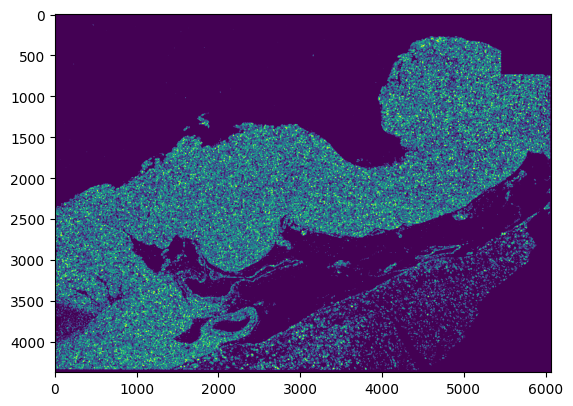

In [16]:
plt.imshow(img)

In [17]:
xd.show()

In [18]:
pixel_size = xd.metadata["pixel_size"]

In [19]:
xd.viewer.add_labels(img, name='cell_mask', scale=(1, 1))

<Labels layer 'cell_mask' at 0x292a48b1df0>

In [20]:
xd.transcripts

,transcript_id,cell_id,overlaps_nucleus,feature_name,x_location,y_location,z_location,qv,fov_name,nucleus_distance
0,281474976710664,UNASSIGNED,0,MYL9,149.553024,73.170303,29.915363,26.524508,AB1,319.470673
1,281474976710702,UNASSIGNED,0,COL3A1,46.675030,21.991718,30.185854,13.201921,AB1,431.237976
2,281474976710706,UNASSIGNED,0,HIF1A,84.918762,158.365494,30.195156,40.000000,AB1,378.817810
3,281474976710707,UNASSIGNED,0,COL3A1,92.162636,170.429077,30.180128,40.000000,AB1,372.528992
4,281474976710709,UNASSIGNED,0,HIF1A,134.156174,191.997559,30.877056,40.000000,AB1,333.722137
...,...,...,...,...,...,...,...,...,...,...
13317975,281646775438518,UNASSIGNED,0,MKLN1,6016.031250,3615.655518,12.617413,40.000000,AF10,170.277191
13317976,281646775438528,UNASSIGNED,0,TAGLN,6028.385742,3518.558838,12.312579,40.000000,AF10,82.158287
13317977,281646775440118,UNASSIGNED,0,LGALS3,6008.562988,3565.473633,12.304045,40.000000,AF10,119.572609
13317978,281646775440120,UNASSIGNED,0,CD47,6014.972656,3578.934570,12.340966,11.326518,AF10,134.050232


In [21]:
xd

XeniumData
Slide ID:	0017313
Sample ID:	N-42-20-T
Data path:	C:\Users\ge37voy\OneDrive - TUM\data\2315_VascularCancer_Mogler\2315-02-glioblastoma\20240112__122324__2315-02-Glioblastoma
Data folder:	output_reseg-0017313__N-42-20-T__20240213__135523
Metadata file:	experiment.xenium
    ➤ images
       nuclei:	(20539, 28483)
    ➤ cells
       matrix
           AnnData object with n_obs × n_vars = 58264 × 314
           obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area'
           var: 'gene_ids', 'feature_types', 'genome'
           obsm: 'spatial'
           varm: 'binned_expression'
       boundaries
           BoundariesData object with 2 entries:
               nuclear
               cellular
    ➤ transcripts
       DataFrame with shape 13317980 x 10

Cell 1570 is very small and only consists of two points. How is that possible?

In [22]:
# cell stats
cs_file = baysor_folder / "segmentation_cell_stats.csv"
cs = pd.read_csv(cs_file)

In [23]:
cs

,cell,x,y,z,cluster,n_transcripts,density,elongation,area,avg_confidence,avg_assignment_confidence,max_cluster_frac,lifespan
0,CRdf5769f9b-1,461.420912,128.143246,30.973813,4,52,0.5759,1.311,90.29,0.9953,0.8712,0.634615,50
1,CRdf5769f9b-2,467.621171,134.560978,30.935955,1,118,1.7870,4.282,66.05,0.9969,0.9441,0.957627,50
2,CRdf5769f9b-3,228.107223,611.779329,29.642477,1,7,0.4084,3.672,17.14,0.8821,0.8629,1.000000,50
3,CRdf5769f9b-4,335.162922,892.123665,28.459066,2,12,0.7552,1.308,15.89,0.8710,0.9717,1.000000,50
4,CRdf5769f9b-5,1457.717373,414.645445,25.214791,4,11,0.6183,2.314,17.79,0.9388,0.9691,1.000000,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97817,CRdf5769f9b-97818,3232.911600,4142.601000,19.829983,1,1,NaN,NaN,NaN,0.9930,0.0200,1.000000,1
97818,CRdf5769f9b-97819,1799.796800,3447.747300,21.551792,2,1,NaN,NaN,NaN,0.9995,0.0200,1.000000,1
97819,CRdf5769f9b-97820,3233.985000,4125.177700,25.230070,2,1,NaN,NaN,NaN,0.9983,0.0200,1.000000,1
97820,CRdf5769f9b-97821,563.335500,3121.807400,27.086958,2,1,NaN,NaN,NaN,0.9939,0.0200,1.000000,1


In [24]:
segcsv_file = baysor_folder / "segmentation.csv"
segdf = pd.read_csv(segcsv_file)

In [25]:
segdf

,transcript_id,cell_id,overlaps_nucleus,gene,x,y,z,qv,fov_name,nucleus_distance,cell_id_renamed,molecule_id,prior_segmentation,confidence,cluster,cell,assignment_confidence,is_noise,ncv_color
0,281474976710664,UNASSIGNED,0,MYL9,149.553020,73.17030,29.915363,26.524508,AB1,319.47067,0,1,0,0.0,1,NaN,1.0,True,#003376
1,281474976710706,UNASSIGNED,0,HIF1A,84.918760,158.36550,30.195156,40.000000,AB1,378.81780,0,2,0,0.0,4,NaN,1.0,True,#FE2A34
2,281474976710707,UNASSIGNED,0,COL3A1,92.162636,170.42908,30.180128,40.000000,AB1,372.52900,0,3,0,0.0,1,NaN,1.0,True,#005EBB
3,281474976710709,UNASSIGNED,0,HIF1A,134.156170,191.99756,30.877056,40.000000,AB1,333.72214,0,4,0,0.0,4,NaN,1.0,True,#AC5D7B
4,281474976710718,UNASSIGNED,0,HIF1A,215.580600,56.40227,29.619436,40.000000,AB1,259.26288,0,5,0,0.0,4,NaN,1.0,True,#B65B78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10911530,281646775435910,UNASSIGNED,0,COL3A1,6029.316000,3505.89670,12.154618,40.000000,AF10,72.05028,0,10911531,0,0.0,1,NaN,1.0,True,#0062C1
10911531,281646775438518,UNASSIGNED,0,MKLN1,6016.031200,3615.65550,12.617413,40.000000,AF10,170.27719,0,10911532,0,0.0,2,NaN,1.0,True,#D46E27
10911532,281646775438528,UNASSIGNED,0,TAGLN,6028.385700,3518.55880,12.312579,40.000000,AF10,82.15829,0,10911533,0,0.0,1,NaN,1.0,True,#0035A1
10911533,281646775440118,UNASSIGNED,0,LGALS3,6008.563000,3565.47360,12.304045,40.000000,AF10,119.57261,0,10911534,0,0.0,1,NaN,1.0,True,#75DE92


In [28]:
import xarray as xr

In [30]:
ds = xr.Dataset(
    data_vars=dict(
        default = (["transcripts"], trans.cell_id.values),
    ),
    coords=dict(
        x = ("transcripts", trans.x_location.values),
        y = ("transcripts", trans.y_location.values),
        z = ("transcripts", trans.z_location.values),
        gene = ("transcripts", trans.feature_name.values)
    ),
)

In [31]:
ds

<xarray.Dataset>
Dimensions:  (transcripts: 13317980)
Coordinates:
    x        (transcripts) float32 149.6 46.68 84.92 ... 6.015e+03 6.026e+03
    y        (transcripts) float32 73.17 21.99 158.4 ... 3.579e+03 3.523e+03
    z        (transcripts) float32 29.92 30.19 30.2 30.18 ... 12.3 12.34 12.11
    gene     (transcripts) object 'MYL9' 'COL3A1' 'HIF1A' ... 'CD47' 'SELENOP'
Dimensions without coordinates: transcripts
Data variables:
    default  (transcripts) object 'UNASSIGNED' 'UNASSIGNED' ... 'UNASSIGNED'

In [8]:
trans = xd.transcripts.copy()

In [9]:
# set index and rename columns
trans = trans.set_index("transcript_id")
trans = trans.rename({
    "cell_id": "xenium_cell_id",
    "x_location": "x",
    "y_location": "y",
    "z_location": "z",
    "feature_name": "gene"
}, axis=1)

# reorder dataframe
trans = trans.loc[:, ["x", "y", "z", "gene", "qv", "overlaps_nucleus", "fov_name", "nucleus_distance", "xenium_cell_id"]]

# group column names into MultiIndices
grouped_column_names = [
    ("coordinates", "x"),
    ("coordinates", "y"),
    ("coordinates", "z"),
    ("properties", "gene"),
    ("properties", "qv"),
    ("properties", "overlaps_nucleus"),
    ("properties", "fov_name"),
    ("properties", "nucleus_distance"),
    ("cell_id", "xenium")
]
trans.columns = pd.MultiIndex.from_tuples(grouped_column_names)

In [10]:
trans

coordinates                         properties             \
                           x            y          z       gene         qv   
transcript_id                                                                
281474976710664   149.553024    73.170303  29.915363       MYL9  26.524508   
281474976710702    46.675030    21.991718  30.185854     COL3A1  13.201921   
281474976710706    84.918762   158.365494  30.195156      HIF1A  40.000000   
281474976710707    92.162636   170.429077  30.180128     COL3A1  40.000000   
281474976710709   134.156174   191.997559  30.877056      HIF1A  40.000000   
...                      ...          ...        ...        ...        ...   
281646775438518  6016.031250  3615.655518  12.617413      MKLN1  40.000000   
281646775438528  6028.385742  3518.558838  12.312579      TAGLN  40.000000   
281646775440118  6008.562988  3565.473633  12.304045     LGALS3  40.000000   
281646775440120  6014.972656  3578.934570  12.340966       CD47  11.326518   
281646775440126  6025.883789  3523.031494  12.111315    SELENOP  27.554773   

                                                               cell_id  
                overlaps_nucleus fov_name nucleus_distance      xenium  
transcript_id                                                           
281474976710664                0      AB1       319.470673  UNASSIGNED  
281474976710702                0      AB1       431.237976  UNASSIGNED  
281474976710706                0      AB1       378.817810  UNASSIGNED  
281474976710707                0      AB1       372.528992  UNASSIGNED  
281474976710709                0      AB1       333.722137  UNASSIGNED  
...                          ...      ...              ...         ...  
281646775438518                0     AF10       170.277191  UNASSIGNED  
281646775438528                0     AF10        82.158287  UNASSIGNED  
281646775440118                0     AF10       119.572609  UNASSIGNED  
281646775440120                0     AF10       134.050232  UNASSIGNED  
281646775440126                0     AF10        84.875092  UNASSIGNED  

[13317980 rows x 9 columns]

In [59]:
test_parquet = baysor_folder / "test.parqet"
trans.to_parquet(test_parquet)

In [60]:
reloaded = pd.read_parquet(test_parquet)

In [61]:
reloaded

coordinates                         properties             \
                           x            y          z       gene         qv   
transcript_id                                                                
281474976710664   149.553024    73.170303  29.915363       MYL9  26.524508   
281474976710702    46.675030    21.991718  30.185854     COL3A1  13.201921   
281474976710706    84.918762   158.365494  30.195156      HIF1A  40.000000   
281474976710707    92.162636   170.429077  30.180128     COL3A1  40.000000   
281474976710709   134.156174   191.997559  30.877056      HIF1A  40.000000   
...                      ...          ...        ...        ...        ...   
281646775438518  6016.031250  3615.655518  12.617413      MKLN1  40.000000   
281646775438528  6028.385742  3518.558838  12.312579      TAGLN  40.000000   
281646775440118  6008.562988  3565.473633  12.304045     LGALS3  40.000000   
281646775440120  6014.972656  3578.934570  12.340966       CD47  11.326518   
281646775440126  6025.883789  3523.031494  12.111315    SELENOP  27.554773   

                                                               cell_id  
                overlaps_nucleus fov_name nucleus_distance      xenium  
transcript_id                                                           
281474976710664                0      AB1       319.470673  UNASSIGNED  
281474976710702                0      AB1       431.237976  UNASSIGNED  
281474976710706                0      AB1       378.817810  UNASSIGNED  
281474976710707                0      AB1       372.528992  UNASSIGNED  
281474976710709                0      AB1       333.722137  UNASSIGNED  
...                          ...      ...              ...         ...  
281646775438518                0     AF10       170.277191  UNASSIGNED  
281646775438528                0     AF10        82.158287  UNASSIGNED  
281646775440118                0     AF10       119.572609  UNASSIGNED  
281646775440120                0     AF10       134.050232  UNASSIGNED  
281646775440126                0     AF10        84.875092  UNASSIGNED  

[13317980 rows x 9 columns]

In [48]:
trans["cell_id", "baysor"] = segdf.set_index("transcript_id")["cell"]

In [49]:
trans

coordinates                         properties             \
                           x            y          z       gene         qv   
transcript_id                                                                
281474976710664   149.553024    73.170303  29.915363       MYL9  26.524508   
281474976710702    46.675030    21.991718  30.185854     COL3A1  13.201921   
281474976710706    84.918762   158.365494  30.195156      HIF1A  40.000000   
281474976710707    92.162636   170.429077  30.180128     COL3A1  40.000000   
281474976710709   134.156174   191.997559  30.877056      HIF1A  40.000000   
...                      ...          ...        ...        ...        ...   
281646775438518  6016.031250  3615.655518  12.617413      MKLN1  40.000000   
281646775438528  6028.385742  3518.558838  12.312579      TAGLN  40.000000   
281646775440118  6008.562988  3565.473633  12.304045     LGALS3  40.000000   
281646775440120  6014.972656  3578.934570  12.340966       CD47  11.326518   
281646775440126  6025.883789  3523.031494  12.111315    SELENOP  27.554773   

                                                               cell_id         
                overlaps_nucleus fov_name nucleus_distance      xenium baysor  
transcript_id                                                                  
281474976710664                0      AB1       319.470673  UNASSIGNED    NaN  
281474976710702                0      AB1       431.237976  UNASSIGNED    NaN  
281474976710706                0      AB1       378.817810  UNASSIGNED    NaN  
281474976710707                0      AB1       372.528992  UNASSIGNED    NaN  
281474976710709                0      AB1       333.722137  UNASSIGNED    NaN  
...                          ...      ...              ...         ...    ...  
281646775438518                0     AF10       170.277191  UNASSIGNED    NaN  
281646775438528                0     AF10        82.158287  UNASSIGNED    NaN  
281646775440118                0     AF10       119.572609  UNASSIGNED    NaN  
281646775440120                0     AF10       134.050232  UNASSIGNED    NaN  
281646775440126                0     AF10        84.875092  UNASSIGNED    NaN  

[13317980 rows x 10 columns]

In [56]:
baysor_results = segdf.set_index("transcript_id")[["cell"]]

In [59]:
baysor_results.columns = pd.MultiIndex.from_tuples([("cell_id", "test")])

In [60]:
baysor_results

,cell_id
,test
transcript_id,
281474976710664,NaN
281474976710706,NaN
281474976710707,NaN
281474976710709,NaN
281474976710718,NaN
...,...
281646775435910,NaN
281646775438518,NaN


In [61]:
merged = pd.merge(left=trans, right=baysor_results, left_index=True, right_index=True)

In [65]:
merged["cell_id"]["test"].notna().sum()

10432037

In [53]:
trans[trans["cell_id", "baysor"].notna()]

coordinates                         properties             \
                           x            y          z       gene         qv   
transcript_id                                                                
281474976710721   226.190903   612.620056  29.635355     COL3A1  22.080009   
281474976710722   228.478714   610.270935  29.585039     COL3A1  22.321152   
281474976712476   227.157043   609.265686  29.644449     COL3A1  20.072735   
281474976712477   230.803345   613.097412  29.668060     COL3A1  40.000000   
281474976712652   232.802490   611.815979  29.590406        VIM  40.000000   
...                      ...          ...        ...        ...        ...   
281603825807904  6037.230957  2294.507812  14.545626    SELENOP  40.000000   
281603825807905  6037.496582  2317.819580  13.715924    SELENOP  34.056591   
281603825807907  6037.868164  2304.670166  16.968857     ATP2B1  40.000000   
281603825807910  6038.817383  2306.939697  14.241941      ATG12  26.970079   
281603825807911  6039.005859  2351.860107  10.591762    SELENOP  23.292053   

                                                               cell_id  \
                overlaps_nucleus fov_name nucleus_distance      xenium   
transcript_id                                                            
281474976710721                0      AB1       485.509552  UNASSIGNED   
281474976710722                0      AB1       487.989227  UNASSIGNED   
281474976712476                0      AB1       488.913910  UNASSIGNED   
281474976712477                0      AB1       485.316345  UNASSIGNED   
281474976712652                0      AB1       486.731018  UNASSIGNED   
...                          ...      ...              ...         ...   
281603825807904                0     AE10         3.393992  afemoeli-1   
281603825807905                0     AE10         2.749307  afeehckp-1   
281603825807907                1     AE10         0.000000  afeojmpg-1   
281603825807910                1     AE10         0.000000  afeojmpg-1   
281603825807911                0     AE10         4.844087  affapnki-1   

                                    
                            baysor  
transcript_id                       
281474976710721      CRdf5769f9b-3  
281474976710722      CRdf5769f9b-3  
281474976712476      CRdf5769f9b-3  
281474976712477      CRdf5769f9b-3  
281474976712652      CRdf5769f9b-3  
...                            ...  
281603825807904  CRdf5769f9b-63186  
281603825807905  CRdf5769f9b-63272  
281603825807907  CRdf5769f9b-63219  
281603825807910  CRdf5769f9b-63219  
281603825807911  CRdf5769f9b-96483  

[10432037 rows x 10 columns]

In [41]:
trans

coordinates                         properties             \
                           x            y          z       gene         qv   
transcript_id                                                                
281474976710664   149.553024    73.170303  29.915363       MYL9  26.524508   
281474976710702    46.675030    21.991718  30.185854     COL3A1  13.201921   
281474976710706    84.918762   158.365494  30.195156      HIF1A  40.000000   
281474976710707    92.162636   170.429077  30.180128     COL3A1  40.000000   
281474976710709   134.156174   191.997559  30.877056      HIF1A  40.000000   
...                      ...          ...        ...        ...        ...   
281646775438518  6016.031250  3615.655518  12.617413      MKLN1  40.000000   
281646775438528  6028.385742  3518.558838  12.312579      TAGLN  40.000000   
281646775440118  6008.562988  3565.473633  12.304045     LGALS3  40.000000   
281646775440120  6014.972656  3578.934570  12.340966       CD47  11.326518   
281646775440126  6025.883789  3523.031494  12.111315    SELENOP  27.554773   

                                                               cell_id  
                overlaps_nucleus fov_name nucleus_distance      xenium  
transcript_id                                                           
281474976710664                0      AB1       319.470673  UNASSIGNED  
281474976710702                0      AB1       431.237976  UNASSIGNED  
281474976710706                0      AB1       378.817810  UNASSIGNED  
281474976710707                0      AB1       372.528992  UNASSIGNED  
281474976710709                0      AB1       333.722137  UNASSIGNED  
...                          ...      ...              ...         ...  
281646775438518                0     AF10       170.277191  UNASSIGNED  
281646775438528                0     AF10        82.158287  UNASSIGNED  
281646775440118                0     AF10       119.572609  UNASSIGNED  
281646775440120                0     AF10       134.050232  UNASSIGNED  
281646775440126                0     AF10        84.875092  UNASSIGNED  

[13317980 rows x 9 columns]

In [47]:
trans["coordinates", "x"]

transcript_id
281474976710664     149.553024
281474976710702      46.675030
281474976710706      84.918762
281474976710707      92.162636
281474976710709     134.156174
                      ...     
281646775438518    6016.031250
281646775438528    6028.385742
281646775440118    6008.562988
281646775440120    6014.972656
281646775440126    6025.883789
Name: (coordinates, x), Length: 13317980, dtype: float32

In [ ]:
ds = xr.Dataset(
    data_vars=dict(
        default = (["transcripts"], segdf.cell_id.values),
        baysor = (["transcripts"], segdf.cell.values)
    ),
    coords=dict(
        x = ("transcripts", segdf.x.values),
        y = ("transcripts", segdf.y.values),
        z = ("transcripts", segdf.z.values),
        gene = ("transcripts", segdf.gene.values)
    ),
)

In [39]:
trans

,transcript_id,cell_id,overlaps_nucleus,feature_name,x_location,y_location,z_location,qv,fov_name,nucleus_distance
0,281474976710664,UNASSIGNED,0,MYL9,149.553024,73.170303,29.915363,26.524508,AB1,319.470673
1,281474976710702,UNASSIGNED,0,COL3A1,46.675030,21.991718,30.185854,13.201921,AB1,431.237976
2,281474976710706,UNASSIGNED,0,HIF1A,84.918762,158.365494,30.195156,40.000000,AB1,378.817810
3,281474976710707,UNASSIGNED,0,COL3A1,92.162636,170.429077,30.180128,40.000000,AB1,372.528992
4,281474976710709,UNASSIGNED,0,HIF1A,134.156174,191.997559,30.877056,40.000000,AB1,333.722137
...,...,...,...,...,...,...,...,...,...,...
13317975,281646775438518,UNASSIGNED,0,MKLN1,6016.031250,3615.655518,12.617413,40.000000,AF10,170.277191
13317976,281646775438528,UNASSIGNED,0,TAGLN,6028.385742,3518.558838,12.312579,40.000000,AF10,82.158287
13317977,281646775440118,UNASSIGNED,0,LGALS3,6008.562988,3565.473633,12.304045,40.000000,AF10,119.572609
13317978,281646775440120,UNASSIGNED,0,CD47,6014.972656,3578.934570,12.340966,11.326518,AF10,134.050232


In [40]:
trans.qv.min()

6.808701

In [41]:
segdf.qv.min()

20.000502

In [38]:
segdf.cell.dropna()

729             CRdf5769f9b-3
730             CRdf5769f9b-3
855             CRdf5769f9b-3
856             CRdf5769f9b-3
868             CRdf5769f9b-3
                  ...        
10910716    CRdf5769f9b-63186
10910717    CRdf5769f9b-63272
10910718    CRdf5769f9b-63219
10910719    CRdf5769f9b-63219
10910720    CRdf5769f9b-96483
Name: cell, Length: 10432037, dtype: object

In [33]:
ds

<xarray.Dataset>
Dimensions:  (transcripts: 10911535)
Coordinates:
    x        (transcripts) float64 149.6 84.92 92.16 ... 6.009e+03 6.026e+03
    y        (transcripts) float64 73.17 158.4 170.4 ... 3.565e+03 3.523e+03
    z        (transcripts) float64 29.92 30.2 30.18 30.88 ... 12.31 12.3 12.11
    gene     (transcripts) object 'MYL9' 'HIF1A' 'COL3A1' ... 'LGALS3' 'SELENOP'
Dimensions without coordinates: transcripts
Data variables:
    default  (transcripts) object 'UNASSIGNED' 'UNASSIGNED' ... 'UNASSIGNED'
    baysor   (transcripts) object nan nan nan nan nan ... nan nan nan nan nan

In [57]:
mask = (ds.x < 2) & (ds.y < 100) & (ds.z < 200)

In [59]:
mask

<xarray.DataArray (transcripts: 161416)>
array([ True,  True, False, ..., False, False, False])
Coordinates:
    x        (transcripts) float64 1.221 1.845 2.298 5.524 ... 349.7 349.8 349.7
    y        (transcripts) float64 5.587 22.26 16.82 5.808 ... 314.8 199.0 136.5
    z        (transcripts) float64 17.08 18.74 14.08 14.42 ... 16.32 14.61 17.21
    gene     (transcripts) object 'KLRK1' 'PARP1' 'TIMP1' ... 'HDC' 'HDC'
Dimensions without coordinates: transcripts

In [66]:
ds.where(ds.x > 100).default

<xarray.DataArray 'default' (transcripts: 161416)>
array([nan, nan, nan, ..., 'ilficmgn-1', 'iokapmjd-1', 'jafmfcio-1'],
      dtype=object)
Coordinates:
    x        (transcripts) float64 1.221 1.845 2.298 5.524 ... 349.7 349.8 349.7
    y        (transcripts) float64 5.587 22.26 16.82 5.808 ... 314.8 199.0 136.5
    z        (transcripts) float64 17.08 18.74 14.08 14.42 ... 16.32 14.61 17.21
    gene     (transcripts) object 'KLRK1' 'PARP1' 'TIMP1' ... 'HDC' 'HDC'
Dimensions without coordinates: transcripts

In [68]:
xd.cells

matrix
    AnnData object with n_obs × n_vars = 1046 × 314
    obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'
boundaries
    BoundariesData object with 2 entries:
        cellular
        nuclear

In [70]:
xd.transcripts

,transcript_id,cell_id,overlaps_nucleus,feature_name,x_location,y_location,z_location,qv,fov_name,nucleus_distance
4819400,281539401220556,bojgkfjl-1,1,KLRK1,1.221191,5.587158,17.079643,40.000000,AD16,0.000000
4819403,281539401220560,bojfmjbo-1,1,PARP1,1.844727,22.256836,18.742792,25.045572,AD16,0.000000
4819404,281539401220565,bojfmjbo-1,0,TIMP1,2.298096,16.815430,14.080606,40.000000,AD16,0.772708
4819416,281539401220598,bojgkfjl-1,1,PARP1,5.524170,5.807617,14.416108,40.000000,AD16,0.000000
4819417,281539401220601,bojpekmg-1,1,SH2B3,6.376221,37.215576,16.898867,40.000000,AD16,0.000000
...,...,...,...,...,...,...,...,...,...,...
6073158,281569466646810,inkfnhkf-1,0,CDH6,349.547119,295.708008,15.103813,35.667240,AE16,1.526855
6073159,281569466646811,inhabjpp-1,0,GUCY1A2,349.693604,227.955566,14.345278,40.000000,AE16,0.099854
6073160,281569466646812,ilficmgn-1,0,GUCY1A2,349.749756,314.770508,16.322037,40.000000,AE16,2.314134
6073161,281569466646814,iokapmjd-1,1,HDC,349.765869,198.994141,14.610005,39.342621,AE16,0.000000


In [71]:
segdf

,Unnamed: 0,transcript_id,cell_id,overlaps_nucleus,gene,x,y,z,qv,fov_name,nucleus_distance,cell_id_renamed,molecule_id,prior_segmentation,confidence,cluster,cell,assignment_confidence,is_noise,ncv_color
0,4819400,281539401220556,bojgkfjl-1,1,KLRK1,1.221191,5.587158,17.079643,40.000000,AD16,0.000000,0,1,0,0.99998,1,CR1548b828b-1386,0.86,False,#009784
1,4819403,281539401220560,bojfmjbo-1,1,PARP1,1.844727,22.256836,18.742792,25.045572,AD16,0.000000,1,2,1,0.99999,1,CR1548b828b-3,1.00,False,#484E1F
2,4819404,281539401220565,bojfmjbo-1,0,TIMP1,2.298096,16.815430,14.080606,40.000000,AD16,0.772707,1,3,1,0.99947,1,CR1548b828b-5,0.52,False,#007CFF
3,4819416,281539401220598,bojgkfjl-1,1,PARP1,5.524170,5.807617,14.416108,40.000000,AD16,0.000000,0,4,0,0.99992,1,CR1548b828b-1386,0.68,False,#007E5D
4,4819417,281539401220601,bojpekmg-1,1,SH2B3,6.376221,37.215576,16.898867,40.000000,AD16,0.000000,2,5,2,0.99998,1,CR1548b828b-7,0.42,False,#005A81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161411,6073158,281569466646810,inkfnhkf-1,0,CDH6,349.547120,295.708000,15.103813,35.667240,AE16,1.526855,953,161412,953,0.99979,1,CR1548b828b-1144,1.00,False,#007AC9
161412,6073159,281569466646811,inhabjpp-1,0,GUCY1A2,349.693600,227.955570,14.345278,40.000000,AE16,0.099854,1064,161413,1064,0.99616,1,CR1548b828b-1309,0.92,False,#494409
161413,6073160,281569466646812,ilficmgn-1,0,GUCY1A2,349.749760,314.770500,16.322037,40.000000,AE16,2.314134,1054,161414,1054,0.99994,1,CR1548b828b-1156,0.88,False,#005F88
161414,6073161,281569466646814,iokapmjd-1,1,HDC,349.765870,198.994140,14.610005,39.342620,AE16,0.000000,955,161415,955,0.99993,1,CR1548b828b-1028,0.98,False,#008291


In [67]:
ds.where(ds.x > 300, drop=True)

<xarray.Dataset>
Dimensions:  (transcripts: 24235)
Coordinates:
    x        (transcripts) float64 304.6 307.9 308.6 312.6 ... 349.7 349.8 349.7
    y        (transcripts) float64 26.11 12.23 21.09 7.406 ... 314.8 199.0 136.5
    z        (transcripts) float64 17.72 15.56 12.92 16.31 ... 16.32 14.61 17.21
    gene     (transcripts) object 'PARP1' 'PARP1' 'PARP1' ... 'HDC' 'HDC'
Dimensions without coordinates: transcripts
Data variables:
    default  (transcripts) object 'jcheeagj-1' 'jdjdcpio-1' ... 'jafmfcio-1'
    baysor   (transcripts) object 'CR1548b828b-1172' ... 'CR1548b828b-910'

In [58]:
ds[mask]

ValueError: Unsupported key-type <class 'xarray.core.dataarray.DataArray'>

In [46]:
ds.dims

Frozen({'transcripts': 161416})

In [48]:
ds.loc(10)

TypeError: '_LocIndexer' object is not callable

In [43]:
ds.indexes["test"] = segdf.transcript_id.values

TypeError: 'Indexes' object does not support item assignment

In [54]:
xr.Dataset(
    data_vars=dict(
        default = segdf[["cell_id", "assignment_confidence"]].values,
        baysor = segdf[["cell", "assignment_confidence"]].values
    ),
    coords=dict(
        x = ("coord", segdf.x.values),
        y = segdf.y.values,
        z = segdf.z.values,
        gene = segdf.gene.values
    )
)

MissingDimensionsError: cannot set variable 'default' with 2-dimensional data without explicit dimension names. Pass a tuple of (dims, data) instead.

array([[  1.2211914,   5.587158 ,  17.079643 ],
       [  1.8447266,  22.256836 ,  18.742792 ],
       [  2.2980957,  16.81543  ,  14.0806055],
       ...,
       [349.74976  , 314.7705   ,  16.322037 ],
       [349.76587  , 198.99414  ,  14.610005 ],
       [349.74927  , 136.54663  ,  17.210468 ]])

In [47]:
xr.Dataset(
    data_vars=dict(
        default = segdf.cell_id.values,
        baysor = segdf.cell.values
    ),
    coords=dict(
        position = (["x", "y", "z"], segdf[["x", "y", "z"]].values)
    )
)

ValueError: Could not convert tuple of form (dims, data[, attrs, encoding]): (['x', 'y', 'z'], array([[  1.2211914,   5.587158 ,  17.079643 ],
       [  1.8447266,  22.256836 ,  18.742792 ],
       [  2.2980957,  16.81543  ,  14.0806055],
       ...,
       [349.74976  , 314.7705   ,  16.322037 ],
       [349.76587  , 198.99414  ,  14.610005 ],
       [349.74927  , 136.54663  ,  17.210468 ]])) to Variable.

In [ ]:
xr.Dataset(
    data_vars=dict(
        default = segdf.cell_id.values,
        baysor = segdf.cell.values
    ),
    coords=dict(
        x = segdf.x.values,
        y = segdf.y.values,
        z = segdf.z.values
    )
)

<xarray.Dataset>
Dimensions:  (default: 161416, baysor: 161416, x: 161416, y: 161416, z: 161416)
Coordinates:
  * default  (default) object 'bojgkfjl-1' 'bojfmjbo-1' ... 'jafmfcio-1'
  * baysor   (baysor) object 'CR1548b828b-1386' ... 'CR1548b828b-910'
  * x        (x) float64 1.221 1.845 2.298 5.524 ... 349.7 349.7 349.8 349.7
  * y        (y) float64 5.587 22.26 16.82 5.808 ... 228.0 314.8 199.0 136.5
  * z        (z) float64 17.08 18.74 14.08 14.42 ... 14.35 16.32 14.61 17.21
Data variables:
    *empty*

In [ ]:
xdf

<xarray.Dataset>
Dimensions:   (index: 1573)
Coordinates:
  * index     (index) int64 0 1 2 3 4 5 6 ... 1566 1567 1568 1569 1570 1571 1572
Data variables:
    geometry  (index) object POLYGON ((339.71167 298.6106, 343.26978 301.3947...
    cell      (index) int64 1144 1175 719 1546 1028 699 ... 979 65 298 1402 1115
    type      (index) object 'polygon' 'polygon' ... 'polygon' 'polygon'
    minx      (index) float64 339.7 242.4 268.6 63.28 ... 68.93 338.9 332.1
    miny      (index) float64 291.7 272.3 120.4 262.8 ... 183.2 318.6 268.5
    maxx      (index) float64 349.9 252.5 281.3 65.14 ... 78.59 341.6 339.5
    maxy      (index) float64 301.4 283.1 131.4 265.7 ... 191.9 321.2 275.1

In [14]:
import scanpy as sc

In [15]:
loomfile = r"C:\Users\ge37voy\Downloads\tmp\baysor\baysor_output-0017321__N-436-21-N__20240219__131654\segmentation_counts.loom"
adata = sc.read_loom(loomfile)

c:\Users\ge37voy\AppData\Local\miniconda3\envs\insitupy\lib\site-packages\anndata\_core\anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
c:\Users\ge37voy\AppData\Local\miniconda3\envs\insitupy\lib\site-packages\anndata\_core\anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [16]:
xd.cells.matrix

AnnData object with n_obs × n_vars = 1046 × 314
    obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'

In [19]:
xd.cells.boundaries.cellular

,cell_id,vertex_x,vertex_y
4420,abbggcnl-1,200.757568,170.680420
4421,abbggcnl-1,197.995117,172.380615
4422,abbggcnl-1,198.632568,181.093018
4423,abbggcnl-1,202.457764,186.617920
4424,abbggcnl-1,205.857666,192.143066
...,...,...,...
594790,jedgdcjb-1,251.970215,10.030518
594791,jedgdcjb-1,251.757568,7.480469
594792,jedgdcjb-1,251.332764,5.992920
594793,jedgdcjb-1,247.720215,1.530518


In [17]:
adata

AnnData object with n_obs × n_vars = 1573 × 320
    obs: 'Name', 'area', 'avg_assignment_confidence', 'avg_confidence', 'cluster', 'density', 'elongation', 'lifespan', 'max_cluster_frac', 'n_transcripts', 'x', 'y', 'z'
    var: 'Name'

In [ ]:
adata.obs

,Name,area,avg_assignment_confidence,avg_confidence,cluster,density,elongation,lifespan,max_cluster_frac,n_transcripts,x,y,z
CellID,,,,,,,,,,,,,
1.0,CR1548b828b-1,15.280,0.9817,0.9984,4,1.5710,1.327,50,1.000000,24,6.678945,2.068309,16.642422
2.0,CR1548b828b-2,93.680,0.8935,0.9886,1,1.0890,2.562,50,0.990196,102,12.842599,5.376065,16.708813
3.0,CR1548b828b-3,77.440,0.9237,0.9865,1,1.1750,1.846,50,1.000000,91,3.035172,22.848029,16.470479
4.0,CR1548b828b-4,56.220,0.9594,0.8552,1,0.6226,3.414,50,0.885714,35,23.598982,3.279715,15.753729
5.0,CR1548b828b-5,114.800,0.8952,0.9950,1,1.4110,2.296,50,0.993827,162,7.282680,15.050926,16.281299
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1569.0,CR1548b828b-1569,NaN,0.1200,0.9996,1,NaN,NaN,6,1.000000,2,75.532472,7.444092,13.794286
1570.0,CR1548b828b-1570,NaN,0.0800,0.9897,1,NaN,NaN,6,1.000000,1,32.771730,209.639650,17.615406
1571.0,CR1548b828b-1571,NaN,0.0700,0.9385,1,NaN,NaN,6,1.000000,2,118.189330,89.144285,13.829876
